In [ ]:
from keras.datasets import imdb
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [ ]:
train_label[0]

1

In [ ]:
train_data.shape

(25000,)

In [ ]:
len(train_data[0])

218

In [ ]:
len(train_data[1])

189

In [ ]:
word_index = imdb.get_word_index()
word_index

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [ ]:
for (key, value) in word_index.items():
  print(key, value)

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 정형화

In [ ]:
import numpy as np

def vectorize_seq(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))   #(25000, 10000)
  for i, s in enumerate(sequences):    #25000번
    results[i, s] = 1.
  return results

In [ ]:
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
#  레이블 -> 실수형으로 변환 
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [ ]:
### 모델링 
from keras import models
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]          #검증용 만건
partial_x_train = x_train[10000:]     #학습용 만오천건 

y_val = y_train[:10000]          #검증용 만건
partial_y_train = y_train[10000:]      #학습용 만오천건 

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5278 - accuracy: 0.7784 - val_loss: 0.4516 - val_accuracy: 0.8143
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3245 - accuracy: 0.9013 - val_loss: 0.3401 - val_accuracy: 0.8681
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2372 - accuracy: 0.9239 - val_loss: 0.3124 - val_accuracy: 0.8730
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1885 - accuracy: 0.9405 - val_loss: 0.2846 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1491 - accuracy: 0.9545 - val_loss: 0.2778 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1260 - accuracy: 0.9613 - val_loss: 0.2868 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1063 - accuracy: 0.9687 - val_loss: 0.3026 - val_accuracy: 0.8826
Epoch 8/20
30

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)   #20

In [ ]:
 list(range(1, len(loss) + 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

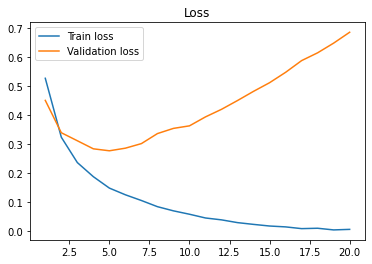

In [ ]:
plt.plot(epochs, loss, label='Train loss')     #=> epoch = 5  
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()
plt.title('Loss')
plt.show()